## Imports

In [134]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA
from tqdm import tqdm
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from IPython.display import display

sns.set_style('whitegrid')
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [168]:
split_frac = 0.9
df = pd.read_csv('../processed_data/v3/BH_rf_impute.csv' , index_col='obs_id').sample(frac=1 , random_state=2)
train_bh = df.iloc[:int(len(df)*split_frac)]
test_bh = df.iloc[int(len(df)*split_frac):]

df = pd.read_csv('../processed_data/v3/CV_rf_impute.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_cv = df.iloc[:int(len(df)*split_frac)]
test_cv = df.iloc[int(len(df)*split_frac):]

df = pd.read_csv('../processed_data/v3/NS_rf_impute.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_ns = df.iloc[:int(len(df)*split_frac)]
test_ns = df.iloc[int(len(df)*split_frac):]

df = pd.read_csv('../processed_data/v3/PULSAR_rf_impute.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_plsr = df.iloc[:int(len(df)*split_frac)]
test_plsr = df.iloc[int(len(df)*split_frac):]

inter_obs_params = ['var_inter_prob' , 'var_inter_index' , 'var_inter_sigma']

data = pd.concat([train_bh , train_ns , train_cv , train_plsr] , axis=0)
df = data.copy()

In [186]:
split_frac = 1
df = pd.read_csv('imp_data/BH_src_imp.csv' , index_col='obs_id').sample(frac=1 , random_state=2)
train_bh = df.copy()

df = pd.read_csv('imp_data/CV_src_imp.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_cv = df.copy()

df = pd.read_csv('imp_data/NS_src_imp.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_ns = df.copy()

df = pd.read_csv('imp_data/PULSAR_src_imp.csv' , index_col='obs_id').sample(frac=1 ,  random_state=2)
train_plsr = df.copy()

inter_obs_params = ['var_inter_prob' , 'var_inter_index' , 'var_inter_sigma']

data = pd.concat([train_bh , train_ns , train_cv , train_plsr] , axis=0)


In [187]:
from sklearn.impute import KNNImputer
info_col = ['class' , 'src_id' , 'src_n' , 'significance']
imputer = KNNImputer(n_neighbors=2)
data_id = data[info_col]
data_val = data.drop(columns=info_col)
data_imp = imputer.fit_transform(data_val)
data_imp = pd.DataFrame(data_imp , columns=data_val.columns.to_list() ,  index=data_val.index.to_list())
data_imp_norm = (data_imp - data_imp.mean()) / data_imp.std()
display(data_val)
display(data_imp_norm)
df  = pd.concat([data_id , data_imp] , axis=1)



photflux_aper_hilim_b  photflux_aper_m  photflux_aper_lolim_h  \
obs_id                                                                          
BH_OBS_53                   -7.138705              NaN                    NaN   
BH_OBS_198                  -5.353302        -5.861066              -7.064694   
BH_OBS_36                   -4.988007        -5.545765              -5.614215   
BH_OBS_43                   -6.822752        -6.858382              -6.342058   
BH_OBS_170                  -5.381534        -6.872247              -6.161025   
...                               ...              ...                    ...   
PULSAR_OBS_421              -4.749824        -5.510604              -5.497027   
PULSAR_OBS_24               -3.456056        -4.103198              -3.944240   
PULSAR_OBS_120              -4.688034        -5.573326              -5.998699   
PULSAR_OBS_10               -3.560667        -4.162285              -4.623058   
PULSAR_OBS_229              -4.528855        -6.602581              -4.735654   

                photflux_aper_b  photflux_aper_hilim_m  photflux_aper_s  \
obs_id                                                                    
BH_OBS_53             -7.462055                    NaN        -7.598944   
BH_OBS_198            -5.458546              -5.742082        -6.395990   
BH_OBS_36             -5.048808              -5.468266        -6.311135   
BH_OBS_43             -7.036732              -7.858550        -7.088257   
BH_OBS_170            -5.550985              -6.524474        -6.838234   
...                         ...                    ...              ...   
PULSAR_OBS_421        -4.834459              -5.371611        -5.565751   
PULSAR_OBS_24         -3.463315              -4.091408        -4.223517   
PULSAR_OBS_120        -4.747875              -5.459921        -5.065199   
PULSAR_OBS_10         -3.573814              -4.142366        -4.042345   
PULSAR_OBS_229        -4.558462              -6.422164        -6.946154   

                photflux_aper_hilim_h  photflux_aper_lolim_s  \
obs_id                                                         
BH_OBS_53                   -7.297483              -8.941574   
BH_OBS_198                  -6.199420              -7.019224   
BH_OBS_36                   -5.404724              -6.651111   
BH_OBS_43                   -7.305834              -7.447332   
BH_OBS_170                  -5.587036              -7.540390   
...                               ...                    ...   
PULSAR_OBS_421              -5.253911              -5.930332   
PULSAR_OBS_24               -3.920096              -4.238824   
PULSAR_OBS_120              -5.585194              -5.151257   
PULSAR_OBS_10               -4.542421              -4.062532   
PULSAR_OBS_229              -4.672641              -7.526446   

                photflux_aper_lolim_m  photflux_aper_lolim_b  ...  var_mean  \
obs_id                                                        ...             
BH_OBS_53                         NaN                    NaN  ...       NaN   
BH_OBS_198                  -6.025166              -5.597739  ...  0.000736   
BH_OBS_36                   -5.646468              -5.119815  ...  0.001534   
BH_OBS_43                   -7.423783              -7.513853  ...  0.000278   
BH_OBS_170                  -7.695898              -5.852015  ...  0.004444   
...                               ...                    ...  ...       ...   
PULSAR_OBS_421              -5.727694              -4.939680  ...  0.003907   
PULSAR_OBS_24               -4.115261              -3.470826  ...  0.049673   
PULSAR_OBS_120              -5.726999              -4.817300  ...  0.002678   
PULSAR_OBS_10               -4.183162              -3.587371  ...  0.034422   
PULSAR_OBS_229              -6.945004              -4.592609  ...  0.008086   

                hard_hm_lolim  hard_hs_lolim  hard_ms  hard_ms_hilim  \
obs_id                                               

photflux_aper_hilim_b  photflux_aper_m  photflux_aper_lolim_h  \
BH_OBS_53                   -2.558811        -1.389756              -2.013734   
BH_OBS_198                  -0.477575        -0.077068              -1.144422   
BH_OBS_36                   -0.051752         0.280910               0.196227   
BH_OBS_43                   -2.190506        -1.209375              -0.476504   
BH_OBS_170                  -0.510484        -1.225117              -0.309179   
...                               ...              ...                    ...   
PULSAR_OBS_421               0.225896         0.320830               0.304541   
PULSAR_OBS_24                1.734036         1.918735               1.739751   
PULSAR_OBS_120               0.297924         0.249619              -0.159144   
PULSAR_OBS_10                1.612091         1.851650               1.112333   
PULSAR_OBS_229               0.483479        -0.918951               1.008262   

                photflux_aper_b  photflux_aper_hilim_m  photflux_aper_s  \
BH_OBS_53             -2.687683              -2.383120        -2.094526   
BH_OBS_198            -0.470847              -0.049731        -0.759948   
BH_OBS_36             -0.017482               0.266671        -0.665809   
BH_OBS_43             -2.217073              -2.495372        -1.527960   
BH_OBS_170            -0.573129              -0.953809        -1.250580   
...                         ...                    ...              ...   
PULSAR_OBS_421         0.219690               0.378358         0.161134   
PULSAR_OBS_24          1.736828               1.857670         1.650231   
PULSAR_OBS_120         0.315493               0.276314         0.716455   
PULSAR_OBS_10          1.614564               1.798787         1.851226   
PULSAR_OBS_229         0.525074              -0.835586        -1.370309   

                photflux_aper_hilim_h  photflux_aper_lolim_s  \
BH_OBS_53                   -2.141898              -2.512817   
BH_OBS_198                  -0.871882              -0.834964   
BH_OBS_36                    0.047262              -0.513670   
BH_OBS_43                   -2.151556              -1.208622   
BH_OBS_170                  -0.163599              -1.289844   
...                               ...                    ...   
PULSAR_OBS_421               0.221692               0.115435   
PULSAR_OBS_24                1.764379               1.591806   
PULSAR_OBS_120              -0.161469               0.795423   
PULSAR_OBS_10                1.044599               1.745676   
PULSAR_OBS_229               0.893987              -1.277674   

                photflux_aper_lolim_m  photflux_aper_lolim_b  ...  var_mean  \
BH_OBS_53                   -1.355232              -2.802032  ... -0.046466   
BH_OBS_198                   0.097311              -0.311155  ... -0.046191   
BH_OBS_36                    0.437836               0.123198  ... -0.044938   
BH_OBS_43                   -1.160324              -2.052583  ... -0.046910   
BH_OBS_170                  -1.405009              -0.542249  ... -0.040369   
...                               ...                    ...  ...       ...   
PULSAR_OBS_421               0.364798               0.286911  ... -0.041211   
PULSAR_OBS_24                1.814696               1.621854  ...  0.030649   
PULSAR_OBS_120               0.365423               0.398134  ... -0.043141   
PULSAR_OBS_10                1.753639               1.515934  ...  0.006703   
PULSAR_OBS_229              -0.729806               0.602340  ... -0.034649   

                hard_hm_lolim  hard_hs_lolim   hard_ms  hard_ms_hilim  \
BH_OBS_53            0.141147      -0.683292 -1.414475      -0.303782   
BH_OBS_198          -1.474027      -0.547168  1.167521       1.305398   
BH_OBS_36           -0.119169       1.190357  1.485519       1.453539   
BH_OBS_43            0.484619      -1.311735 -1.414475      -1.736358   
BH_OBS_170           1.352337       0.970440 -0.774236     

## Combine observation

In [188]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)

In [194]:
src_list = np.unique(df['src_n'].to_list())
df_comb_val = pd.DataFrame()
df_comb_id = pd.DataFrame()
df_comb = pd.DataFrame()
info_col = ['src_n' , 'src_id' , 'class']
for s in src_list[:]:
    df_temp = df[df['src_n']==s]
    data_id = df_temp[info_col]
    data_val = df_temp.drop(columns=info_col)
    temp = pca.fit_transform(data_val.T).T
    #temp = temp.components_
    temp = pd.DataFrame(temp , columns=data_val.columns.to_list() )
    temp_mean  =df_temp[df_temp['src_n']==s].sum().to_frame().T 
    temp_mean = temp_mean.drop(columns = info_col)/ len(df_temp)
    df_comb = df_comb.append(pd.concat([data_id.iloc[:1,:].reset_index(drop=True), temp_mean.reset_index(drop=True) ] , axis=1))
#    display(data_val , temp , data_id.iloc[:1,:])
df_comb = df_comb.set_index('src_id')
display(df_comb)

src_n class significance photflux_aper_hilim_b  \
src_id                                                                    
BH0001    1A 0620-00              BH        23.63              -4.66715   
NS0001    1A 1742-289             NS       167.36              -6.13821   
NS0003    1A 1743-288             NS         42.8              -6.08082   
NS0004    1A 1744-361             NS         11.5              -4.49594   
NS0006    1H 1715-321             NS         2.32              -5.81673   
...                        ...   ...          ...                   ...   
CV0020  [HPH2013] 196             CV         8.11              -5.96979   
CV0032  [HPH2013] 252             CV        13.41              -6.29735   
CV0035  [HPH2013] 273             CV         9.19              -4.38897   
CV0037  [HPH2013] 50              CV         9.94              -5.51431   
CV0039  [HPH2013] 81              CV         7.81              -5.06699   

       photflux_aper_m photflux_aper_lolim_h photflux_aper_b  \
src_id                                                         
BH0001         -5.3705              -5.44361        -4.69758   
NS0001         -6.6696              -7.20605        -6.35425   
NS0003        -6.74184              -7.42377         -6.2727   
NS0004        -5.14219               -5.0855         -4.5321   
NS0006        -6.69422              -7.64412        -5.97265   
...                ...                   ...             ...   
CV0020        -6.35321              -6.75284        -5.97427   
CV0032        -6.76988              -7.19499        -6.50191   
CV0035        -5.18773              -5.30439        -4.47597   
CV0037        -6.14025              -7.11887        -5.61728   
CV0039        -6.10368               -5.8473        -5.17263   

       photflux_aper_hilim_m photflux_aper_s photflux_aper_hilim_h  ...  \
src_id                                                              ...   
BH0001              -5.32031        -5.20768              -5.31074  ...   
NS0001              -7.01157        -6.76025              -6.25661  ...   
NS0003              -6.52564         -6.3055              -6.46954  ...   
NS0004              -5.08688         -5.3493              -4.95979  ...   
NS0006              -6.44818        -6.32103              -6.46827  ...   
...                      ...             ...                   ...  ...   
CV0020              -6.41308         -6.1671              -6.37921  ...   
CV0032              -6.70175        -6.68766              -6.40165  ...   
CV0035              -5.04923        -5.03078              -4.93064  ...   
CV0037               -6.0991        -5.56102              -5.86581  ...   
CV0039              -5.71848        -5.88044              -5.39998  ...   

           var_mean hard_hm_lolim hard_hs_lolim   hard_ms hard_ms_hilim  \
src_id                                                                    
BH0001   0.00322142    -0.0959667     -0.275433 -0.186533     -0.107633   
NS0001   0.00103453      0.507415      0.226119 -0.866931     0.0719192   
NS0003  0.000268175       -0.3317      -0.20985    0.2811       0.46785   
NS0004     0.004965        0.0481        0.2705    0.2411        0.3504   
NS0006   0.00027255        -0.614            -1   -0.4372       -0.0643   
...             ...           ...           ...       ...           ...   
CV0020    0.0035199       -0.2844     -0.828033 -0.870517     -0.244633   
CV0032     0.003317     -0.217025     -0.871025   -0.9994        0.0356   
CV0035   0.00553169      -0.10995     -0.314175 -0.212675      0.054975   
CV0037   0.00348001    -0.0779988     -0.623921 -0.957747     -0.220461   
CV0039   0.00676761      -0.08682      -0.29994  -0.37304       0.30244   

       hard_ms_lolim     hard_hm hard_hm_hilim hard_hs_hilim   hard_hs  
src_id                                                                  
BH0001     -0.264233  0.00166667     0.0951667    -0.0968333   -0.1857  
NS0001     -0.895065      0.9994             

In [195]:
from features import features as feat 
all_feat = list(feat['info'])+list(feat['flux']['photon'])+list(feat['flux']['energy'])+list(feat['variability'])+list(feat['hardness'])+list(feat['model_fit']['powerlaw'])+list(feat['model_fit']['bb'])+list(feat['model_fit']['brems'])+list(feat['info_pre_filter'])
feat_to_drop = list(feat['model_fit']['powerlaw']) + list(feat['model_fit']['bb']) + list(feat['model_fit']['brems']) 
#feat_to_drop = []
feat_used = [item for item in all_feat if item not in feat_to_drop]

In [196]:
from train_test_src import train_src , test_src 

In [197]:
inter_obs_params = ['var_inter_prob' , 'var_inter_index' , 'var_inter_sigma']
df_comb = df_comb.sample(frac=1)
#df_comb = df_comb.drop(columns=inter_obs_params)
df_comb = df_comb[df_comb['class'].isin(['CV' , 'NS' , 'BH' , 'PULSAR'])]
train_data = df_comb[df_comb['src_n'].isin(train_src)]
val_data = df_comb[df_comb['src_n'].isin(test_src)]

train_data.to_csv('current_data/train_data.csv')

val_data.to_csv('current_data/val_data.csv')

In [198]:
display(train_data)
#display(test_data)
display(val_data)

src_n   class significance photflux_aper_hilim_b  \
src_id                                                                      
CV0069  CXOGLB J002402.1-72054      CV        46.73              -4.47344   
BH0001    1A 0620-00                BH        23.63              -4.66715   
PL0075          PSR J1718-3825  PULSAR        15.54              -4.64099   
PL0072          PSR J1709-4429  PULSAR        50.09              -3.88563   
CV0096  CXOU J192056.3+374613       CV        10.63              -5.05631   
...                        ...     ...          ...                   ...   
PL0124          PSR J2028+3332  PULSAR         2.97              -5.73731   
PL0054           PSR J1429-591  PULSAR         4.19               -5.4661   
PL0065          PSR J1635-4735  PULSAR        15.74              -4.74693   
PL0029           PSR J1023-574  PULSAR        22.45              -4.66653   
CV0016  [HPH2013] 160               CV         19.7              -5.98989   

       photflux_aper_m photflux_aper_lolim_h photflux_aper_b  \
src_id                                                         
CV0069        -5.26177              -5.24349        -4.52844   
BH0001         -5.3705              -5.44361        -4.69758   
PL0075          -5.365              -5.22437        -4.68797   
PL0072        -4.60562               -4.7163        -3.90037   
CV0096        -5.78015              -5.83744        -5.09534   
...                ...                   ...             ...   
PL0124        -6.76371              -6.42632        -5.86012   
PL0054        -6.43616              -5.87322        -5.55909   
PL0065        -6.60181              -4.97582         -4.8059   
PL0029        -5.48345               -5.0935        -4.71237   
CV0016        -6.59441              -6.92935        -6.26063   

       photflux_aper_hilim_m photflux_aper_s photflux_aper_hilim_h  ...  \
src_id                                                              ...   
CV0069              -5.16682        -5.13905              -5.00763  ...   
BH0001              -5.32031        -5.20768              -5.31074  ...   
PL0075              -5.29297        -5.36759              -5.07313  ...   
PL0072              -4.58048        -4.38727              -4.64406  ...   
CV0096               -5.7167        -5.63865              -5.66736  ...   
...                      ...             ...                   ...  ...   
PL0124               -6.5177        -6.42285              -5.99268  ...   
PL0054              -6.24787         -6.8671              -5.62599  ...   
PL0065              -6.48511        -6.66266              -4.84743  ...   
PL0029              -5.40998         -6.1005              -4.97164  ...   
CV0016              -6.39781        -6.21553              -6.27341  ...   

          var_mean hard_hm_lolim hard_hs_lolim   hard_ms hard_ms_hilim  \
src_id                                                                   
CV0069  0.00465529        0.0283     -0.113723 -0.137323     0.0225385   
BH0001  0.00322142    -0.0959667     -0.275433 -0.186533     -0.107633   
PL0075  0.00315204       0.14115        0.1149  -0.01125       0.14055   
PL0072     11.3674      -0.13115       -0.3585   -0.2461       -0.2111   
CV0096  0.00134327       -0.0718       -0.2342   -0.1674       -0.0618   
...            ...           ...           ...       ...           ...   
PL0124  0.00033915        0.3442       -0.0269   -0.4222       -0.0194   
PL0054    0.000798        0.4991        0.7252     0.446        0.7876   
PL0065    0.006039      0.928175      0.929575 -0.102125      0.667863   
PL0029  0.00319326       0.38695      0.792025   0.68365      0.802625   
CV0016  0.00250757     -0.220175     -0.871025   -0.9994      -0.26235   

       hard_ms_lolim     hard_hm hard_hm_hilim hard_hs_hilim    hard_hs  
src_id                                                                   
CV0069     -0.286885    0.177008      0.315523      0.197131  0.0423769  
BH0001     -0.264233  0.00166

src_n   class significance photflux_aper_hilim_b  \
src_id                                                                      
BH0031    GS 1354-645               BH         2.44              -6.21965   
CV0062  2XMM J231519.0-591029       CV        10.04              -4.85918   
NS0041    XB 1732-304               NS         4.72              -5.28489   
CV0064  CHI J172550-3533 2          CV        10.41               -4.0145   
CV0049  1WGA J1617.0-2258           CV        5.275              -5.69126   
NS0049    XTE J1709-267             NS       212.84              -4.24024   
PL0138          PSR J2339-0533  PULSAR        16.48              -4.17908   
NS0080    4U1745-203                NS          2.5              -5.61675   
CV0052  1WGA J1910.8-5958           CV           14              -4.79685   
NS0019    EXO 0748-676              NS         62.8              -3.50204   
NS0062    J1824-2452                NS           92               -4.6074   
PL0006          PSR J0205+6449  PULSAR       179.61              -3.40543   
PL0002          PSR J0023+0923  PULSAR         6.39              -4.89716   
NS0054    BW ANT                    NS          3.7              -5.52129   
CV0112  XSS J12270-4859             CV        27.61              -4.01633   
NS0016    CEN X-4                   NS        49.44               -3.5867   
PL0008          PSR J0357+3205  PULSAR        20.23              -4.69872   
CV0054  2XMM J004414.4+412204       CV         6.53              -4.65074   
CV0102  IGR J15529-5029             CV        14.12              -3.64589   
BH0022    CXOU J100517.1-07421      BH        11.12              -6.16829   
NS0011    3A 2129+470               NS        41.03              -4.18472   
PL0001          PSR J0007+7303  PULSAR         15.5              -4.68508   
BH0004    GRO J1655-40              BH        13.83              -4.92891   
PL0010          PSR J0359+5414  PULSAR         9.65              -5.53888   
BH0006    GX 339-4                  BH        39.86              -4.03895   
CV0063  CHI J162011-5002 1          CV         5.79              -3.99654   
NS0033    KS 1731-260               NS        14.81              -5.41773   
PL0011          PSR J0418+5732  PULSAR        73.32              -4.79465   
BH0003    GINGA 1354-645            BH        20.86              -4.65797   
CV0055  2XMM J020052.2-092431       CV        13.56              -4.42493   
PL0012          PSR J0437-4715  PULSAR       113.03              -3.41397   
BH0023    CXOU J100518.5-07413      BH        14.07              -5.39881   
BH0021    CXOU J100516.5-07420      BH        16.75              -5.89298   
PL0009          PSR J0358+5413  PULSAR        19.44               -5.0506   

       photflux_aper_m photflux_aper_lolim_h photflux_aper_b  \
src_id                                                         
BH0031        -6.89724              -7.55849        -6.44357   
CV0062        -5.56976              -6.04556        -4.90032   
NS0041        -5.96936              -6.11264        -5.37115   
CV0064        -4.68956              -4.85227        -4.06879   
CV0049        -6.40808              -6.77893        -5.78647   
NS0049        -4.86414              -5.59964        -4.27806   
PL0138        -4.95001               -4.7333        -4.20468   
NS0080        -6.27891              -6.97456        -5.81646   
CV0052        -5.57543               -5.5207        -4.83408   
NS0019        -4.09604              -4.89538        -3.50938   
NS0062        -5.41091                 -5.13        -4.65865   
PL0006        -4.04777              -3.90436        -3.41035   
PL0002        -5.88498              -7.10225         -4.9874   
NS0054        -6.41364              -6.42228        -5.62233   
CV0112        -4.70333              -4.47925        -4.03175   
NS0016        -4.59929              -4.81192        -3.60328   
PL0008        -5.47854              -5.66891        -4.73238   
CV0054        -5.87661              

In [199]:
def abt_data(d):
    print('total sources:' , len((np.unique(d['src_n']))))
    print('total obs : ' , len(d))
    print(d['class'].value_counts())
    print('CV src :' ,  len( np.unique(d[d['class']=='CV']['src_id']) ))
    print('PULSAR src :' ,  len( np.unique(d[d['class']=='PULSAR']['src_id']) ))
    print('XRB src :' ,  len( np.unique(d[d['class']=='XRB']['src_id']) ))
    print('NS src :' ,  len( np.unique(d[d['class']=='NS']['src_id']) ))
    print('BH src :' ,  len( np.unique(d[d['class']=='BH']['src_id']) ))
abt_data(train_data)
print('------------------------------------')
abt_data(val_data)

total sources: 217
total obs :  217
PULSAR    108
CV         56
NS         33
BH         20
Name: class, dtype: int64


KeyError: 'src_id'

In [200]:

# enaable these two lines for NS-BH
train_data = pd.read_csv('current_data/train_data.csv' , index_col='src_id')
#test_data = pd.read_csv('current_data/test_data.csv' , index_col='obs_id')
val_data = pd.read_csv('current_data/val_data.csv' , index_col='src_id')

train_data = train_data.replace('NS' , 'XRB')
train_data = train_data.replace('BH' , 'XRB')

#test_data = test_data.replace('NS' , 'XRB')
#test_data = test_data.replace('BH' , 'XRB')
val_data = val_data.replace('BH' , 'XRB')
val_data = val_data.replace('NS' , 'XRB')

class_to_select = ['CV' , 'XRB' , 'PULSAR']
data = train_data[train_data['class'].isin(class_to_select)]
display(data)
#display(val_data)


src_n   class  significance  photflux_aper_hilim_b  \
src_id                                                                        
CV0069  CXOGLB J002402.1-72054      CV         46.73              -4.473441   
BH0001    1A 0620-00               XRB         23.63              -4.667146   
PL0075          PSR J1718-3825  PULSAR         15.54              -4.640992   
PL0072          PSR J1709-4429  PULSAR         50.09              -3.885627   
CV0096  CXOU J192056.3+374613       CV         10.63              -5.056308   
...                        ...     ...           ...                    ...   
PL0124          PSR J2028+3332  PULSAR          2.97              -5.737312   
PL0054           PSR J1429-591  PULSAR          4.19              -5.466101   
PL0065          PSR J1635-4735  PULSAR         15.74              -4.746928   
PL0029           PSR J1023-574  PULSAR         22.45              -4.666526   
CV0016  [HPH2013] 160               CV         19.70              -5.989885   

        photflux_aper_m  photflux_aper_lolim_h  photflux_aper_b  \
src_id                                                            
CV0069        -5.261767              -5.243493        -4.528438   
BH0001        -5.370500              -5.443614        -4.697582   
PL0075        -5.365000              -5.224367        -4.687970   
PL0072        -4.605623              -4.716302        -3.900372   
CV0096        -5.780154              -5.837436        -5.095339   
...                 ...                    ...              ...   
PL0124        -6.763715              -6.426316        -5.860121   
PL0054        -6.436163              -5.873219        -5.559091   
PL0065        -6.601809              -4.975816        -4.805897   
PL0029        -5.483448              -5.093495        -4.712368   
CV0016        -6.594411              -6.929353        -6.260625   

        photflux_aper_hilim_m  photflux_aper_s  photflux_aper_hilim_h  ...  \
src_id                                                                 ...   
CV0069              -5.166823        -5.139050              -5.007633  ...   
BH0001              -5.320309        -5.207679              -5.310744  ...   
PL0075              -5.292973        -5.367586              -5.073126  ...   
PL0072              -4.580480        -4.387267              -4.644065  ...   
CV0096              -5.716699        -5.638650              -5.667360  ...   
...                       ...              ...                    ...  ...   
PL0124              -6.517698        -6.422853              -5.992679  ...   
PL0054              -6.247875        -6.867100              -5.625985  ...   
PL0065              -6.485105        -6.662664              -4.847430  ...   
PL0029              -5.409982        -6.100499              -4.971642  ...   
CV0016              -6.397813        -6.215528              -6.273409  ...   

         var_mean  hard_hm_lolim  hard_hs_lolim   hard_ms  hard_ms_hilim  \
src_id                                                                     
CV0069   0.004655       0.028300      -0.113723 -0.137323       0.022538   
BH0001   0.003221      -0.095967      -0.275433 -0.186533      -0.107633   
PL0075   0.003152       0.141150       0.114900 -0.011250       0.140550   
PL0072  11.367421      -0.131150      -0.358500 -0.246100      -0.211100   
CV0096   0.001343      -0.071800      -0.234200 -0.167400      -0.061800   
...           ...            ...            ...       ...            ...   
PL0124   0.000339       0.344200      -0.026900 -0.422200      -0.019400   
PL0054   0.000798       0.499100       0.725200  0.446000       0.787600   
PL0065   0.006039       0.928175       0.929575 -0.102125       0.667863   
PL0029   0.003193       0.386950       0.792025  0.683650       0.802625   
CV0016   0.002508      -0.220175      -0.871025 -0.999400      -0.262350   

        hard_ms_lolim   hard_hm  hard_hm_hilim  hard_hs_hilim   hard_hs  
src_id                                         

In [203]:
info_col = [ 'class' ,  'significance' , 'src_n' ,]
data_info = data[info_col]
data_val = data.drop(columns=info_col) 
#data_val = data.copy()
data_label = data['class']

In [204]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# Hyper Parameter Tuning

In [100]:
rfc_v2 = RandomForestClassifier()

## Random Search

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
n_estimators = [int(x) for x in np.linspace(80 , 800 , num=40)]
max_features = ['log2' , 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 150, num = 40)]
min_samples_split = [int(x) for x in np.linspace(2,20 ,num = 30)]
min_samples_leaf = [int(x) for x in np.linspace(2,30 , num = 30)]
bootstrap = [True , False]

In [178]:
params_dict = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features ,
    'max_depth' :max_depth , 
    'min_samples_split' : min_samples_split , 
    'min_samples_leaf' : min_samples_leaf, 
    'bootstrap' : bootstrap 
}

In [179]:
rs = RandomizedSearchCV(
    rfc_v2 , 
    params_dict , 
    n_iter = 100,
    cv = 5 ,
    verbose = 5 ,
    n_jobs=-1 , 
    random_state= 0 
)

In [180]:
rs.fit(data_val , data_label)
rs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                393                       6                     18   
1                135                       9                     30   
2                763                       9                      7   
3                523                      16                     26   
4                135                       9                     20   
5                 98                       8                     15   
6                596                      12                     30   
7                578                      18                     30   
8                578                      15                     12   
9                301                       6                     17   

  param_max_features param_max_depth param_bootstrap  split3_test_score  \
0               log2               1            True           0.397683   
1               sqrt               1           False           0.397683   
2               sqrt               1           False           0.397683   
3               sqrt               1           False           0.397683   
4               log2             123            True           0.335907   
5               sqrt              58            True           0.343629   
6               log2              65            True           0.328185   
7               sqrt              62            True           0.332046   
8               log2               4            True           0.351351   
9               sqrt             107            True           0.347490   

   split4_test_score  mean_test_score  rank_test_score  
0           0.399225         0.397992                1  
1           0.399225         0.397992                1  
2           0.399225         0.397992                1  
3           0.399225         0.397992                1  
4           0.387597         0.367867                5  
5           0.399225         0.367104                6  
6           0.403101         0.364790                7  
7           0.399225         0.364015                8  
8           0.395349         0.364012                9  
9           0.387597         0.364006               10

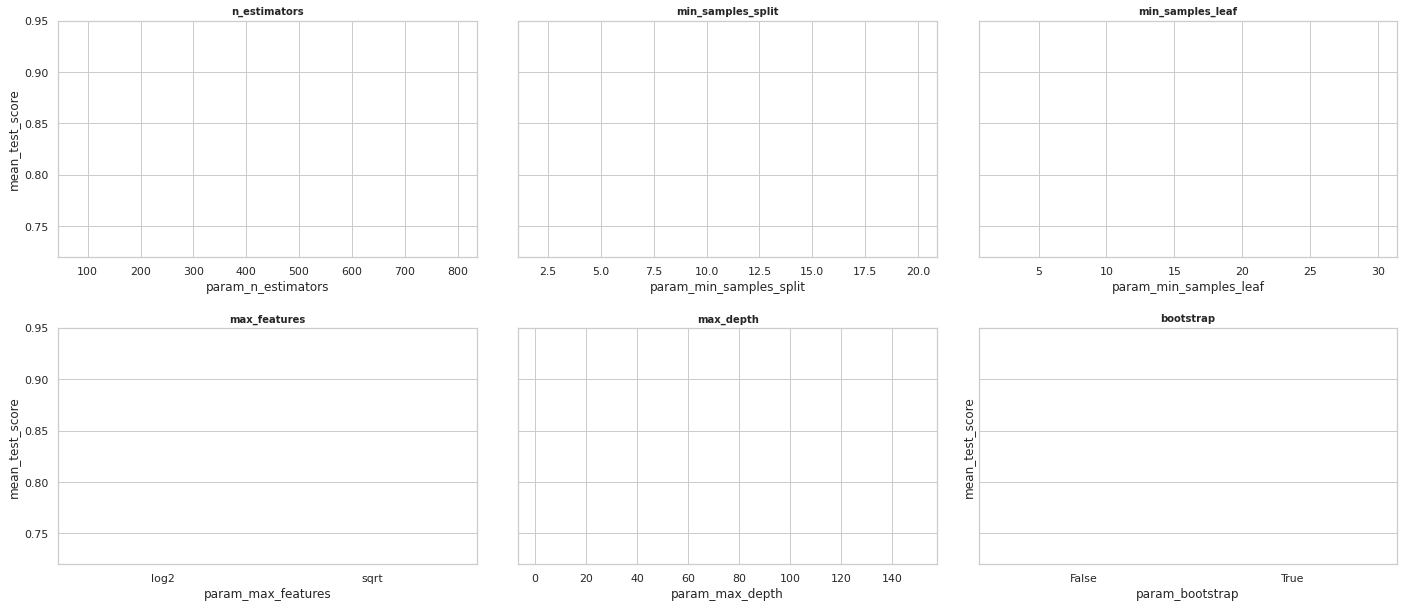

In [ ]:
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig, axs = plt.subplots(ncols=3, nrows=2  , sharey=True)
fig.set_size_inches(24,10)
colors = sns.diverging_palette(240, 0, n=6 , center='dark')
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0],color=colors[5]) 
axs[0,0].set_ylim([.72,.95])
axs[0,0].set_title(label = 'n_estimators', size=10, weight='bold')
sns.lineplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1],color=colors[4])
#axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=10, weight='bold')
sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2],color=colors[3])
#axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=10, weight='bold')
sns.boxplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0],color=colors[0])
#axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=10, weight='bold')
sns.lineplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1],color=colors[1])
#axs[1,1].set_ylim([.80,.93])
axs[1,1].set_title(label = 'max_depth', size=10, weight='bold')
sns.boxplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2] , color=colors[2])
#axs[1,2].set_ylim([.88,.92])
axs[1,2].set_title(label = 'bootstrap', size=10, weight='bold')
fig.subplots_adjust(wspace=0.1 , hspace=0.3)

plt.show()


### Result
> Best Model Parameters
```

{'n_estimators': 288,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 150,
 'bootstrap': False}
```
> Best Parameter values

```
{'n_estimators': [136 , 309 , 347,385],
 'min_samples_split': [7,12,44],
 'min_samples_leaf': [2,7,12],
 'max_features': 'sqrt',
 'max_depth': [43 ,85, 100],
 'bootstrap': False}
```

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators = [140 , 170 , 230]
max_features = ['sqrt'] 
bootstrap = [False]
max_depth =  [56 ,85, 100]
min_samples_leaf = [2,12]
min_samples_split = [7,18,28]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
gs = GridSearchCV(rfc_v2 , param_grid , cv=5 , verbose=5 , n_jobs=-1)
gs.fit(data_val , data_label)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [56, 85, 100],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 12],
                         'min_samples_split': [7, 18, 28],
                         'n_estimators': [140, 170, 230]},
             verbose=5)

In [ ]:
gs.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 18,
 'n_estimators': 140}

# Best Random Forest

So Now we have identified best random Forest , lets see how its various performance are.

## Load Data

In [205]:
np.random.seed(433)
data = data.sample(frac=1)


In [206]:
data_label = data['class']
x = data.copy()
y = data_label.copy()

## Train and save model

{'n_estimators': 402,
 'min_samples_split': 16,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 12,
 'bootstrap': False}

In [207]:
# Find and fit besst model
train_acc = []
test_acc = []
val_acc = []
best_clf = ''
score = 0 
for i in tqdm(range(10)):
    rs = int(np.random.uniform(10 , 99999))
    '''
    27601 0.958974358974359
    79324
    '''
    #rs = 31544 # all
    #rs = 31374 # CV-XRB 
    #rs = 65845 # xrb-pulsar
    #rs = 59360 #cv-pulsar
    #rs = 31544 # NS-BH

    #np.random.seed(rs)
    df =  x.sample(frac=1 , random_state=rs)
    y = df['class']
    x_train , x_test , _ , _ = train_test_split(df , y , test_size = 0.2 , shuffle=True, random_state=10 , stratify=y)
    info_col = ['significance' , 'class','src_n' ,]
    id_train = x_train[info_col]
    id_test = x_test[info_col]
    sig_train = id_train['significance']
    y_train = x_train['class']
    y_test = x_test['class']
    x_train = x_train.drop(columns = info_col)
    #x_train = (x_train - x_train.mean()) / x_train.std()
    x_test = x_test.drop(columns=info_col )
    #display(x_test)
    #x_test = (x_test - x_test.mean()) / x_test.std()
    #np.random.seed(5926)


    info_col = [ 'significance' , 'class' , 'src_n' , ]
    x_val = val_data.copy()
    y_val = x_val['class']
    id_val = x_val[info_col]
    x_val = x_val.drop(columns=info_col)

    
   # x_val 

    clf = RandomForestClassifier(
        n_estimators= 300 , 
        criterion='entropy' ,
        random_state=12,
        max_depth=85 , 
        min_samples_leaf= 2 , 
        min_samples_split=2 , 
        bootstrap=False ,
        max_features='sqrt' ,
        class_weight='balanced' , 
        #sample_weight = sig_train
        )

    clf.fit(x_train , y_train)
    tr = clf.score(x_train , y_train)
    test_score = clf.score(x_test , y_test)
    val_score = clf.score(x_val , y_val)
    train_score = clf.score(x_train , y_train)
    print(test_score , train_score , val_score)
    train_acc.append(train_score)
    test_acc.append(test_score)
    val_acc.append(val_score)
    
    '''
    if(next_score > score):
        best_clf = clf
        score = next_score
        print('better found' , rs , next_score)
    '''
    #print(next_score , score)
    #print('\n -----------------')
    #print(rs , tst)
    ##train_acc.append(tr)
    #test_acc.append(tst)

 10%|█         | 1/10 [00:01<00:11,  1.25s/it]

0.5681818181818182 1.0 0.5294117647058824


 20%|██        | 2/10 [00:02<00:10,  1.32s/it]

0.5454545454545454 1.0 0.47058823529411764


 30%|███       | 3/10 [00:03<00:08,  1.25s/it]

0.5 1.0 0.47058823529411764


 40%|████      | 4/10 [00:04<00:06,  1.16s/it]

0.5681818181818182 1.0 0.47058823529411764


 50%|█████     | 5/10 [00:05<00:05,  1.13s/it]

0.75 1.0 0.5294117647058824


 60%|██████    | 6/10 [00:07<00:04,  1.16s/it]

0.6590909090909091 1.0 0.38235294117647056


 70%|███████   | 7/10 [00:08<00:03,  1.19s/it]

0.5227272727272727 1.0 0.5


 80%|████████  | 8/10 [00:09<00:02,  1.25s/it]

0.4318181818181818 1.0 0.47058823529411764


 90%|█████████ | 9/10 [00:11<00:01,  1.29s/it]

0.5681818181818182 1.0 0.47058823529411764


100%|██████████| 10/10 [00:12<00:00,  1.24s/it]

0.6363636363636364 1.0 0.5


In [208]:
score = pd.DataFrame(np.asarray([train_acc , test_acc , val_acc ]).T , columns=['train_score' ,'test_sc' ,'val_score' ])

In [209]:
score.describe()

train_score    test_sc  val_score
count         10.0  10.000000  10.000000
mean           1.0   0.575000   0.479412
std            0.0   0.089027   0.041710
min            1.0   0.431818   0.382353
25%            1.0   0.528409   0.470588
50%            1.0   0.568182   0.470588
75%            1.0   0.619318   0.500000
max            1.0   0.750000   0.529412

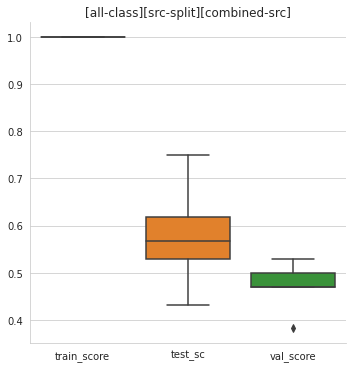

In [210]:
sns.catplot(
    data = score , 
    kind='box' ,
)
plt.title('[all-class][src-split][combined-src]')
plt.savefig('all_all_class_src_val_train_test_val_combined_src.jpg')

In [211]:
clf.predict_proba(x_val)

array([[0.41661141, 0.02524537, 0.55814322],
       [0.05803255, 0.87210501, 0.06986244],
       [0.08487076, 0.16862837, 0.74650088],
       [0.29385391, 0.33730884, 0.36883725],
       [0.22849422, 0.24303732, 0.52846846],
       [0.11971638, 0.48446536, 0.39581825],
       [0.15535307, 0.63541019, 0.20923674],
       [0.11813979, 0.46971564, 0.41214457],
       [0.64171442, 0.247883  , 0.11040257],
       [0.32969199, 0.57669835, 0.09360966],
       [0.04541083, 0.65480793, 0.29978124],
       [0.09557961, 0.80829876, 0.09612163],
       [0.28397243, 0.668055  , 0.04797257],
       [0.42883028, 0.55987445, 0.01129527],
       [0.04282277, 0.87812757, 0.07904966],
       [0.48230389, 0.34596667, 0.17172944],
       [0.13169755, 0.83443827, 0.03386418],
       [0.09065354, 0.08512331, 0.82422315],
       [0.85382487, 0.11336184, 0.0328133 ],
       [0.12094487, 0.00732796, 0.87172718],
       [0.39032807, 0.49331282, 0.11635911],
       [0.1619401 , 0.73279943, 0.10526046],
       [0.

In [162]:
df_tuc = df[df['class']=='TUC']
df_tuc

Empty DataFrame
Columns: [src_n, class, significance, photflux_aper_hilim_b, photflux_aper_m, photflux_aper_lolim_h, photflux_aper_b, photflux_aper_hilim_m, photflux_aper_s, photflux_aper_hilim_h, photflux_aper_lolim_s, photflux_aper_lolim_m, photflux_aper_lolim_b, photflux_aper_h, photflux_aper_hilim_s, flux_aper_hilim, flux_aper_lolim, flux_aper_b, flux_aper_m, flux_aper_lolim_b, flux_aper_lolim_s, flux_aper_hilim_h, photflux_aper_hilim, flux_aper_hilim_b, flux_aper_hilim_s, flux_aper_hilim_m, photflux_aper_lolim, photflux_aper, flux_aper_lolim_h, flux_aper_s, flux_aper_h, flux_aper_lolim_m, flux_aper, kp_prob, var_min, var_max, ks_prob, var_sigma, var_prob, var_index, var_mean, hard_hm_lolim, hard_hs_lolim, hard_ms, hard_ms_hilim, hard_ms_lolim, hard_hm, hard_hm_hilim, hard_hs_hilim, hard_hs]
Index: []

[0 rows x 50 columns]

### Test performance

In [164]:
info_col = [ 'significance' , 'class' , 'src_n' , ]
x_val = val_data.copy()
y_val = x_val['class']
id_val = x_val[info_col]
x_val = x_val.drop(columns=info_col)
x_val 

photflux_aper_hilim_b  photflux_aper_m  photflux_aper_lolim_h  \
src_id                                                                  
CV0052              -4.796851        -5.575435              -5.520698   
BH0006              -4.038946        -4.659189              -4.544637   
PL0009              -5.050602        -5.764654              -5.653913   
CV0064              -4.014504        -4.689562              -4.852272   
NS0049              -4.240236        -4.864137              -5.599640   
CV0055              -4.424928        -5.193413              -5.051391   
BH0031              -6.219645        -6.897244              -7.558489   
PL0006              -3.405434        -4.047770              -3.904363   
NS0080              -5.616750        -6.278915              -6.974562   
BH0022              -6.168285        -7.100686              -7.391332   
PL0001              -4.685080        -5.498667              -5.275642   
NS0019              -3.502042        -4.096042              -4.895384   
PL0008              -4.698722        -5.478542              -5.668907   
NS0041              -5.284890        -5.969358              -6.112643   
BH0023              -5.398808        -6.100909              -6.600705   
BH0004              -4.928915        -5.597398              -5.369192   
BH0003              -4.657967        -5.255695              -5.160741   
BH0021              -5.892983        -6.651160              -7.181648   
NS0062              -4.607401        -5.410909              -5.130004   
PL0002              -4.897155        -5.884984              -7.102248   
CV0063              -3.996539        -5.389766              -4.239804   
PL0011              -4.794647        -5.346906              -5.911494   
CV0112              -4.016329        -4.703335              -4.479255   
PL0012              -3.413966        -4.225297              -4.577055   
CV0049              -5.691262        -6.408076              -6.778926   
PL0138              -4.179076        -4.950007              -4.733298   
CV0054              -4.650742        -5.876610              -5.438331   
NS0011              -4.184718        -4.891604              -6.123765   
CV0102              -3.645892        -4.561141              -3.996539   
PL0010              -5.538884        -6.235210              -6.739105   
NS0054              -5.521289        -6.413638              -6.422278   
CV0062              -4.859178        -5.569764              -6.045565   
NS0016              -3.586700        -4.599289              -4.811916   
NS0033              -5.417733        -5.901655              -6.875674   

        photflux_aper_b  photflux_aper_hilim_m  photflux_aper_s  \
src_id                                                            
CV0052        -4.834084              -5.508619        -5.375630   
BH0006        -4.055861              -4.633230        -4.864412   
PL0009        -5.101717              -5.686218        -5.861120   
CV0064        -4.068789              -4.610070        -4.695795   
NS0049        -4.278062              -4.808852        -4.726047   
CV0055        -4.454940              -5.140682        -5.023971   
BH0031        -6.443566              -6.732172        -6.690946   
PL0006        -3.410352              -4.039836        -4.169391   
NS0080        -5.816461              -6.057760        -6.606113   
BH0022        -6.281171              -6.958776        -6.522269   
PL0001        -4.712198              -5.449160        -5.269379   
NS0019        -3.509381              -4.084284        -3.766235   
PL0008        -4.732382              -5.421079        -5.083574   
NS0041        -5.371148              -5.837875        -6.297733   
BH0023        -5.453716              -6.014397        -5.838442   
BH0004        -4.976162              -5.524357        -6.236631   
BH0003        -4.694479              -5.201945        -5.660965   
BH0021        -5.976355              -6.517395        -6.360544   
NS0062        -4.658646              -5

In [165]:
x_val

photflux_aper_hilim_b  photflux_aper_m  photflux_aper_lolim_h  \
src_id                                                                  
CV0052              -4.796851        -5.575435              -5.520698   
BH0006              -4.038946        -4.659189              -4.544637   
PL0009              -5.050602        -5.764654              -5.653913   
CV0064              -4.014504        -4.689562              -4.852272   
NS0049              -4.240236        -4.864137              -5.599640   
CV0055              -4.424928        -5.193413              -5.051391   
BH0031              -6.219645        -6.897244              -7.558489   
PL0006              -3.405434        -4.047770              -3.904363   
NS0080              -5.616750        -6.278915              -6.974562   
BH0022              -6.168285        -7.100686              -7.391332   
PL0001              -4.685080        -5.498667              -5.275642   
NS0019              -3.502042        -4.096042              -4.895384   
PL0008              -4.698722        -5.478542              -5.668907   
NS0041              -5.284890        -5.969358              -6.112643   
BH0023              -5.398808        -6.100909              -6.600705   
BH0004              -4.928915        -5.597398              -5.369192   
BH0003              -4.657967        -5.255695              -5.160741   
BH0021              -5.892983        -6.651160              -7.181648   
NS0062              -4.607401        -5.410909              -5.130004   
PL0002              -4.897155        -5.884984              -7.102248   
CV0063              -3.996539        -5.389766              -4.239804   
PL0011              -4.794647        -5.346906              -5.911494   
CV0112              -4.016329        -4.703335              -4.479255   
PL0012              -3.413966        -4.225297              -4.577055   
CV0049              -5.691262        -6.408076              -6.778926   
PL0138              -4.179076        -4.950007              -4.733298   
CV0054              -4.650742        -5.876610              -5.438331   
NS0011              -4.184718        -4.891604              -6.123765   
CV0102              -3.645892        -4.561141              -3.996539   
PL0010              -5.538884        -6.235210              -6.739105   
NS0054              -5.521289        -6.413638              -6.422278   
CV0062              -4.859178        -5.569764              -6.045565   
NS0016              -3.586700        -4.599289              -4.811916   
NS0033              -5.417733        -5.901655              -6.875674   

        photflux_aper_b  photflux_aper_hilim_m  photflux_aper_s  \
src_id                                                            
CV0052        -4.834084              -5.508619        -5.375630   
BH0006        -4.055861              -4.633230        -4.864412   
PL0009        -5.101717              -5.686218        -5.861120   
CV0064        -4.068789              -4.610070        -4.695795   
NS0049        -4.278062              -4.808852        -4.726047   
CV0055        -4.454940              -5.140682        -5.023971   
BH0031        -6.443566              -6.732172        -6.690946   
PL0006        -3.410352              -4.039836        -4.169391   
NS0080        -5.816461              -6.057760        -6.606113   
BH0022        -6.281171              -6.958776        -6.522269   
PL0001        -4.712198              -5.449160        -5.269379   
NS0019        -3.509381              -4.084284        -3.766235   
PL0008        -4.732382              -5.421079        -5.083574   
NS0041        -5.371148              -5.837875        -6.297733   
BH0023        -5.453716              -6.014397        -5.838442   
BH0004        -4.976162              -5.524357        -6.236631   
BH0003        -4.694479              -5.201945        -5.660965   
BH0021        -5.976355              -6.517395        -6.360544   
NS0062        -4.658646              -5

In [166]:
test_score =  clf.score(x_val , y_val)
print(test_score)

0.5882352941176471


In [167]:
x_val

photflux_aper_hilim_b  photflux_aper_m  photflux_aper_lolim_h  \
src_id                                                                  
CV0052              -4.796851        -5.575435              -5.520698   
BH0006              -4.038946        -4.659189              -4.544637   
PL0009              -5.050602        -5.764654              -5.653913   
CV0064              -4.014504        -4.689562              -4.852272   
NS0049              -4.240236        -4.864137              -5.599640   
CV0055              -4.424928        -5.193413              -5.051391   
BH0031              -6.219645        -6.897244              -7.558489   
PL0006              -3.405434        -4.047770              -3.904363   
NS0080              -5.616750        -6.278915              -6.974562   
BH0022              -6.168285        -7.100686              -7.391332   
PL0001              -4.685080        -5.498667              -5.275642   
NS0019              -3.502042        -4.096042              -4.895384   
PL0008              -4.698722        -5.478542              -5.668907   
NS0041              -5.284890        -5.969358              -6.112643   
BH0023              -5.398808        -6.100909              -6.600705   
BH0004              -4.928915        -5.597398              -5.369192   
BH0003              -4.657967        -5.255695              -5.160741   
BH0021              -5.892983        -6.651160              -7.181648   
NS0062              -4.607401        -5.410909              -5.130004   
PL0002              -4.897155        -5.884984              -7.102248   
CV0063              -3.996539        -5.389766              -4.239804   
PL0011              -4.794647        -5.346906              -5.911494   
CV0112              -4.016329        -4.703335              -4.479255   
PL0012              -3.413966        -4.225297              -4.577055   
CV0049              -5.691262        -6.408076              -6.778926   
PL0138              -4.179076        -4.950007              -4.733298   
CV0054              -4.650742        -5.876610              -5.438331   
NS0011              -4.184718        -4.891604              -6.123765   
CV0102              -3.645892        -4.561141              -3.996539   
PL0010              -5.538884        -6.235210              -6.739105   
NS0054              -5.521289        -6.413638              -6.422278   
CV0062              -4.859178        -5.569764              -6.045565   
NS0016              -3.586700        -4.599289              -4.811916   
NS0033              -5.417733        -5.901655              -6.875674   

        photflux_aper_b  photflux_aper_hilim_m  photflux_aper_s  \
src_id                                                            
CV0052        -4.834084              -5.508619        -5.375630   
BH0006        -4.055861              -4.633230        -4.864412   
PL0009        -5.101717              -5.686218        -5.861120   
CV0064        -4.068789              -4.610070        -4.695795   
NS0049        -4.278062              -4.808852        -4.726047   
CV0055        -4.454940              -5.140682        -5.023971   
BH0031        -6.443566              -6.732172        -6.690946   
PL0006        -3.410352              -4.039836        -4.169391   
NS0080        -5.816461              -6.057760        -6.606113   
BH0022        -6.281171              -6.958776        -6.522269   
PL0001        -4.712198              -5.449160        -5.269379   
NS0019        -3.509381              -4.084284        -3.766235   
PL0008        -4.732382              -5.421079        -5.083574   
NS0041        -5.371148              -5.837875        -6.297733   
BH0023        -5.453716              -6.014397        -5.838442   
BH0004        -4.976162              -5.524357        -6.236631   
BH0003        -4.694479              -5.201945        -5.660965   
BH0021        -5.976355              -6.517395        -6.360544   
NS0062        -4.658646              -5

In [256]:
pred = clf.predict(x_val)
for s , p in zip(pred , x_val.index.to_list()):
    print(s , p)

XRB BH_OBS_112
XRB PULSAR_OBS_47
PULSAR PULSAR_OBS_38
XRB PULSAR_OBS_50
PULSAR NS_OBS_79
XRB BH_OBS_194
PULSAR NS_OBS_80
XRB BH_OBS_110
PULSAR PULSAR_OBS_42
PULSAR PULSAR_OBS_43
PULSAR PULSAR_OBS_30
PULSAR PULSAR_OBS_34
XRB BH_OBS_117
XRB NS_OBS_150
XRB BH_OBS_101
PULSAR NS_OBS_434
XRB BH_OBS_104
XRB PULSAR_OBS_39
XRB BH_OBS_97
XRB BH_OBS_95
XRB BH_OBS_106
XRB BH_OBS_116
XRB BH_OBS_100
XRB PULSAR_OBS_32
PULSAR NS_OBS_360
XRB PULSAR_OBS_51
PULSAR BH_OBS_15
XRB PULSAR_OBS_46
PULSAR PULSAR_OBS_28
XRB NS_OBS_323
XRB PULSAR_OBS_41
PULSAR NS_OBS_321
PULSAR BH_OBS_14
PULSAR BH_OBS_12
PULSAR PULSAR_OBS_33
XRB NS_OBS_73
XRB NS_OBS_137
PULSAR PULSAR_OBS_52
PULSAR PULSAR_OBS_23
XRB BH_OBS_107
XRB PULSAR_OBS_29
XRB BH_OBS_98
PULSAR NS_OBS_359
PULSAR BH_OBS_10
PULSAR PULSAR_OBS_0
XRB BH_OBS_111
XRB NS_OBS_149
XRB BH_OBS_118
XRB BH_OBS_13
PULSAR PULSAR_OBS_26
PULSAR PULSAR_OBS_24
XRB BH_OBS_114
XRB PULSAR_OBS_2
PULSAR PULSAR_OBS_27
XRB BH_OBS_113
XRB PULSAR_OBS_444
XRB BH_OBS_195
PULSAR PULSAR_OBS_3

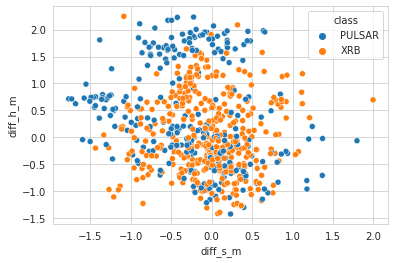

In [257]:
df['diff_s_m'] = df['flux_aper_s'] - df['flux_aper_m']
df['diff_h_m'] = df['flux_aper_h'] - df['flux_aper_m']
sns.scatterplot(
    data = df , 
    #kind = 'scatter' ,
    x = 'diff_s_m' , 
    y = 'diff_h_m' , 
    hue = 'class'
    )
plt.show()

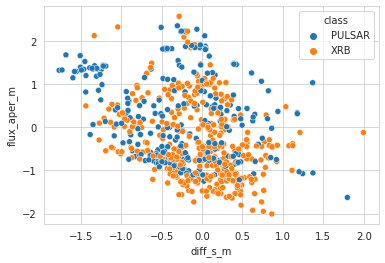

In [258]:
sns.scatterplot(
    data = df , 
    #kind = 'scatter' ,
    x = 'diff_s_m' , 
    y = 'flux_aper_m' , 
    hue = 'class'
    )
plt.show()

In [259]:
feat_imp = clf.feature_importances_
feat_names = x_train.columns.to_list()
feat = pd.DataFrame()
feat.insert( 0 , 'feat_name' , feat_names)
feat.insert(1 , 'feat_imp' , feat_imp)
feat = feat.sort_values(by = 'feat_imp' , ascending=False).reset_index(drop=True)
feat_names_sorted = feat['feat_name']
display(feat)
#feat.to_csv('result/feat_imp.csv')

feat_name  feat_imp
0   photflux_aper_lolim_b  0.053209
1         photflux_aper_b  0.049345
2         flux_aper_lolim  0.038930
3   photflux_aper_hilim_b  0.034909
4     photflux_aper_lolim  0.033743
5       flux_aper_lolim_b  0.031884
6               var_sigma  0.031576
7                var_prob  0.029788
8       flux_aper_lolim_h  0.029468
9   photflux_aper_lolim_h  0.028215
10    photflux_aper_hilim  0.026133
11          hard_hs_lolim  0.022187
12          photflux_aper  0.021948
13                hard_hm  0.021829
14                var_min  0.021610
15  photflux_aper_lolim_m  0.021553
16               var_mean  0.021139
17          hard_hm_hilim  0.020739
18        flux_aper_hilim  0.020589
19            flux_aper_h  0.019955
20        photflux_aper_h  0.019926
21            flux_aper_s  0.019023
22            flux_aper_b  0.018912
23      flux_aper_hilim_s  0.018912
24          hard_hm_lolim  0.018761
25      flux_aper_hilim_h  0.018742
26  photflux_aper_hilim_h  0.018263
27      flux_aper_hilim_b  0.018232
28  photflux_aper_hilim_m  0.017957
29              flux_aper  0.017397
30  photflux_aper_hilim_s  0.017162
31          hard_hs_hilim  0.016688
32            flux_aper_m  0.016215
33        photflux_aper_m  0.016145
34      flux_aper_lolim_m  0.016016
35      flux_aper_hilim_m  0.015831
36                hard_hs  0.014912
37  photflux_aper_lolim_s  0.013599
38      flux_aper_lolim_s  0.013478
39        photflux_aper_s  0.013382
40                var_max  0.012879
41                hard_ms  0.012857
42                kp_prob  0.012578
43          hard_ms_hilim  0.011793
44                ks_prob  0.011138
45          hard_ms_lolim  0.010887
46              var_index  0.009570

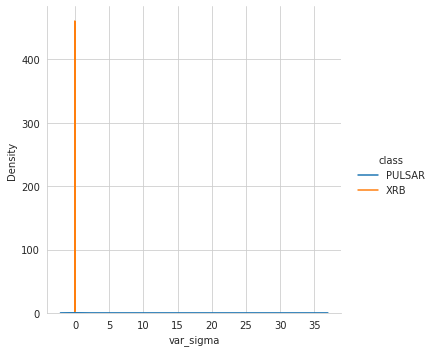

In [260]:
sns.displot(
    data = df , 
    #kind = 'scatter' ,
    x = 'var_sigma' , 
    #y = 'flux_aper_m' , 
    hue = 'class' , 
    kind='kde'
    )
plt.show()

### Save model


In [ ]:
import joblib 
joblib.dump(best_clf , 'forest/v2/all-clf-no-norm.joblib' , compress=3)

['forest/v2/all-clf-no-norm.joblib']